In [1]:
# import necessary liabrary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# check the shape of data set
df.shape

(1338, 7)

In [5]:
# check the data type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# handling the null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# fetch the duplicate value
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [5]:
# check the statistical behaviour
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# seperate the numerical and categorical column
cat_col=df.select_dtypes(include='object').columns
num_col=df.select_dtypes(exclude='object').columns
print(cat_col)
print(num_col)

Index(['sex', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'children', 'charges'], dtype='object')


# applying EDA 

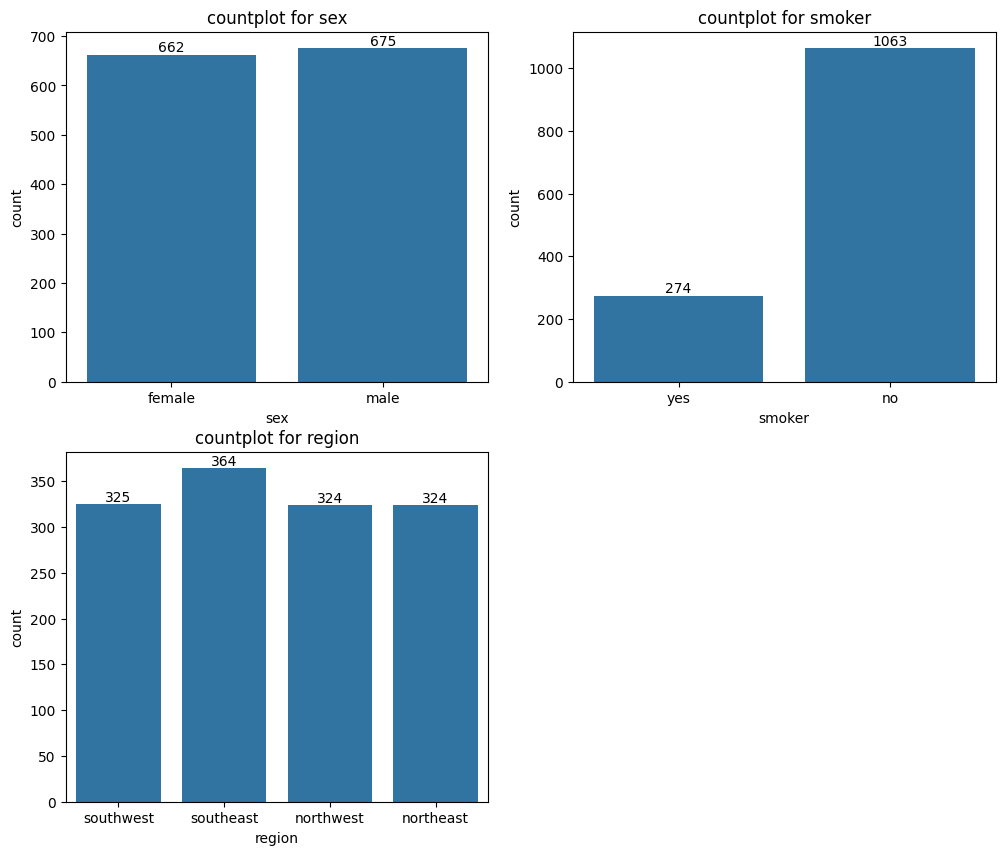

In [6]:
plt.figure(figsize=(12,10))
for i in range(len(cat_col)):
    plt.subplot(2,2,i+1)
    ax=sns.countplot(x=df[cat_col[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'countplot for {cat_col[i]}')
plt.show()

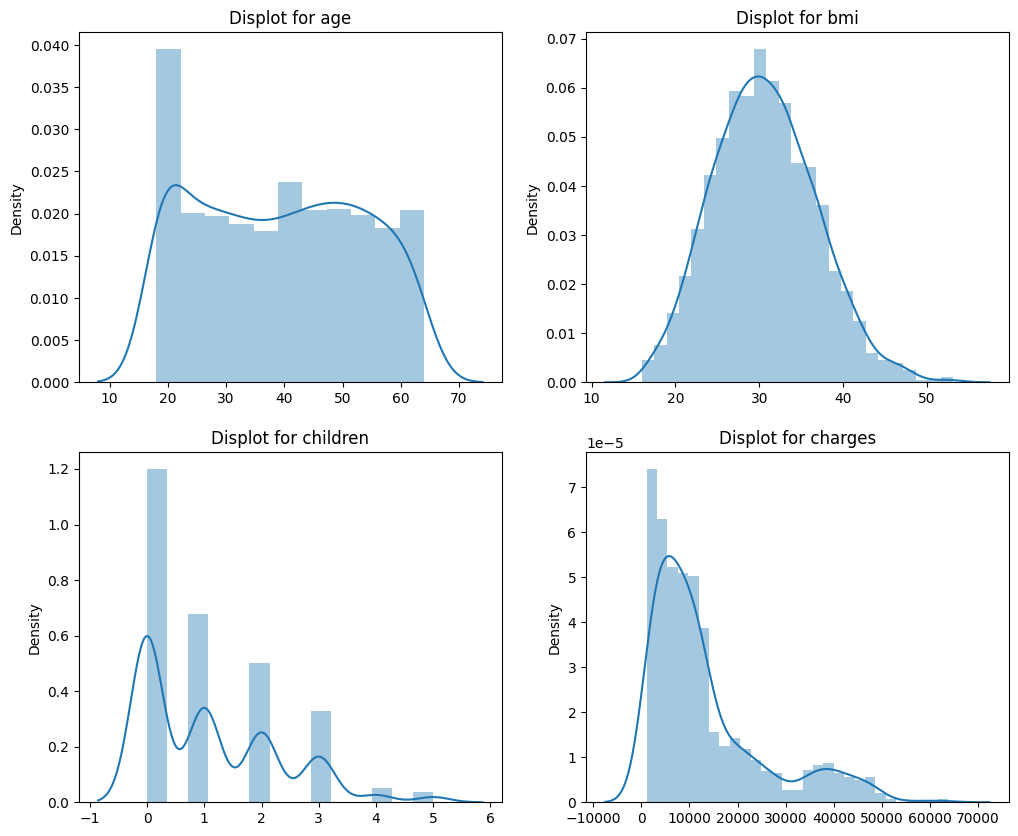

In [7]:
plt.figure(figsize=(12,10))
for i in range (len(num_col)):
    plt.subplot(2,2,i+1)
    sns.distplot(x=df[num_col[i]])
    plt.title(f'Displot for {num_col[i]}')
plt.show()

# ploting a box plot for knowing the outliers

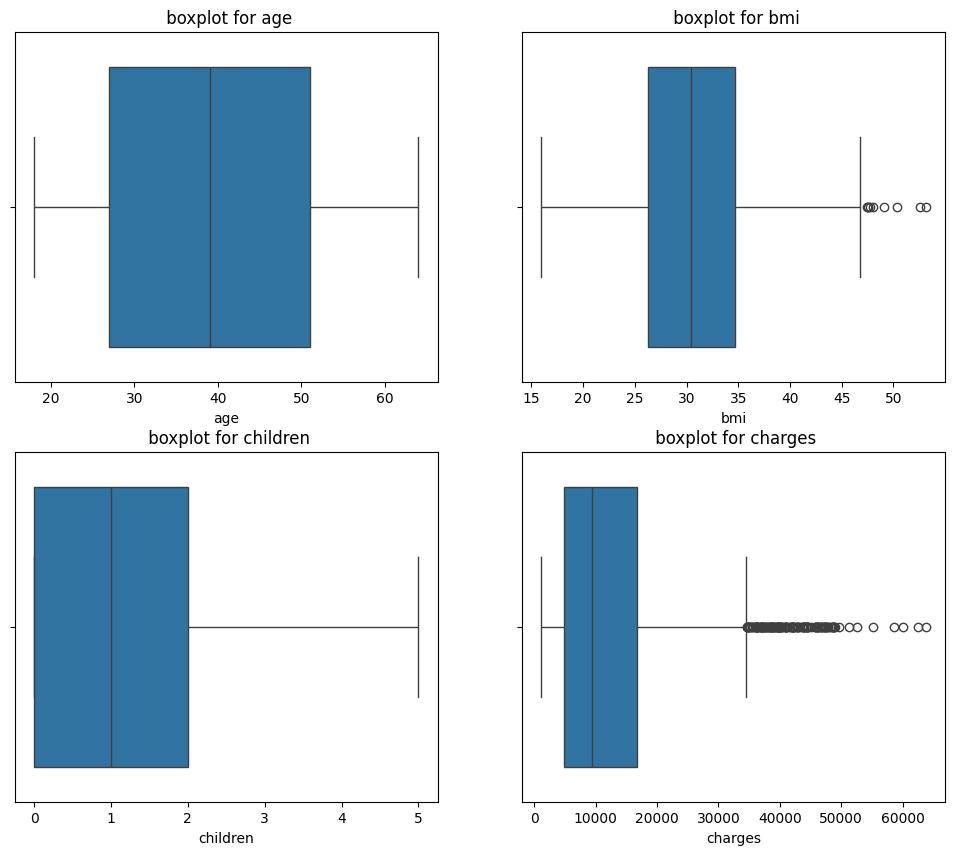

In [8]:
plt.figure(figsize=(12,10))
for i in range (len(num_col)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.title(f' boxplot for {num_col[i]}')
plt.show()

# Outliers treatment

In [7]:
col=['bmi','charges']
a=df[col].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
a

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
bmi,1337.0,30.663452,6.100468,15.9600,30.4000,41.1080,41.800000,42.455200,43.920800,46.411200,53.13000
charges,1337.0,13279.121487,12110.359656,1121.8739,9386.1613,41210.0498,42920.126232,44495.190584,46677.324238,48537.796878,63770.42801


In [8]:
print(df[df['bmi']>46.411200].shape)
print(df[df['charges']>41210.0498].shape)

(14, 7)
(67, 7)


In [9]:
df1=df.copy()

In [10]:
df['bmi']=np.where(df['bmi']>46.411200,46.411200,df['bmi'])
df['charges']=np.where(df['charges']>41210.0498,41210.0498,df['charges'])

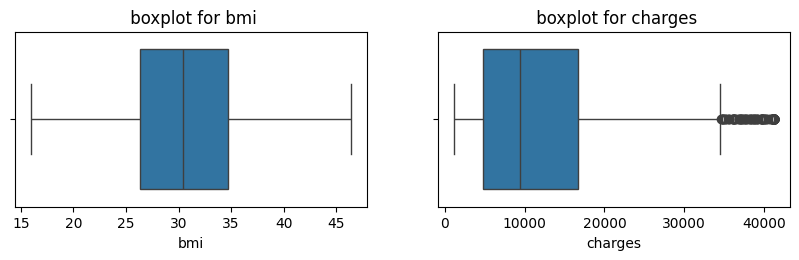

In [11]:
plt.figure(figsize=(10,5))
for i in range (len(col)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[col[i]])
    plt.title(f' boxplot for {col[i]}')
plt.show()

# Encode categorical features

In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in cat_col:
    df[i]=lb.fit_transform(df[i])


In [13]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

# select independent and dependent variable

In [14]:
x=df.drop('charges',axis=1)
y=df['charges']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(1337, 6)
(1337,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=80)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(935, 6)
(402, 6)
(935,)
(402,)


# Function to evaluate model performance

In [16]:
from sklearn.metrics import *

In [18]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    test_mse =  mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test,ypred)
    res = pd.DataFrame({'Train_Score':train_score,'Test_Score':test_score,
                       'Test_MAE':test_mae,'Test_MSE':test_mse,'Test_rmse':test_rmse},
                      index=[mname])
    return res,ypred

# import ml model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor, AdaBoostRegressor

# Linear Reg

In [20]:
lr1 = LinearRegression()
lr1_res,ypred_lr1 = eval_model(lr1,x_train, x_test, y_train, y_test,'LinReg')
lr1_res

,Train_Score,Test_Score,Test_MAE,Test_MSE,Test_rmse
LinReg,0.755168,0.754061,3713.730183,3.008791e+07,5485.245197


# Decision tree reg

In [21]:
dt1 = DecisionTreeRegressor(max_depth=8,min_samples_split=10)
dt1_res,ypred_dt1 = eval_model(dt1,x_train, x_test, y_train, y_test,'DTree_Reg')
dt1_res

,Train_Score,Test_Score,Test_MAE,Test_MSE,Test_rmse
DTree_Reg,0.916553,0.809411,2544.91753,2.331639e+07,4828.70501


# Random forest reg

In [22]:
rf1 = RandomForestRegressor(n_estimators=80,max_depth=9,min_samples_split=12)
rf1_res,ypred_rf1 = eval_model(rf1,x_train, x_test, y_train, y_test,'RF_Reg')
rf1_res

,Train_Score,Test_Score,Test_MAE,Test_MSE,Test_rmse
RF_Reg,0.913055,0.855345,2318.516643,1.769686e+07,4206.763923


# saving the model

In [23]:
import pickle

In [24]:
pickle.dump(lr1,open('lr1_model_insurance.pkl','wb'))
pickle.dump(dt1,open('dt1_model_insurance.pkl','wb'))
pickle.dump(rf1,open('rf1_model_insurance.pkl','wb'))